In [1]:
!pip install missingno

In [2]:
!pip freeze

alabaster==0.7.12
altair==3.1.0
anaconda-client==1.7.2
anaconda-navigator==1.9.6
anaconda-project==0.8.2
asn1crypto==0.24.0
astroid==2.1.0
astropy==3.1
atomicwrites==1.2.1
attrs==18.2.0
Babel==2.6.0
backcall==0.1.0
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.3
bitarray==0.8.3
bkcharts==0.2
blaze==0.11.3
bleach==3.0.2
bokeh==1.0.2
boto==2.49.0
Bottleneck==1.2.1
branca==0.3.1
certifi==2018.11.29
cffi==1.11.5
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
clyent==1.2.2
colorama==0.4.1
comtypes==1.1.7
conda==4.7.5
conda-build==3.17.6
conda-package-handling==1.3.10
conda-verify==3.1.1
contextlib2==0.5.5
cryptography==2.4.2
cycler==0.10.0
Cython==0.29.2
cytoolz==0.9.0.1
dask==1.0.0
datashape==0.5.4
decorator==4.3.0
defusedxml==0.5.0
distributed==1.25.1
docutils==0.14
entrypoints==0.2.3
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==3.0.10
Flask==1.0.2
Flask-Cors==3.0.7
folium==0.9.1
future==0.17.1
gevent==1.3.7
glob2==0.6
greenlet==0.4.15
h5py==2.8.0
heapdic

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline
from calendar import day_name

In [4]:
# importing datasheet 
data1 = pd.read_csv('example_sprit_cut_station.csv', sep=';')
data2 = pd.read_csv('example_sprit_cut_prices.csv',sep=';')

In [5]:
data1.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [6]:
data2.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [7]:
data1.describe()

,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


In [8]:
data2.shape

(2189526, 6)

In [9]:
data1.shape

(824, 12)

# Data Cleaning

In [10]:
data2.describe()

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [11]:
#Function to drop records of negative prices of different fuels
def drop_neg(col_name):
    col_neg = data2[data2[col_name]<=0]
    data2.drop(col_neg.index,axis=0,inplace=True)

In [12]:
drop_neg('E5')
drop_neg('E10')
drop_neg('DIESEL')

In [13]:
data2.describe()

,E5,E10,DIESEL,CHANGED
count,2.150850e+06,2.150850e+06,2.150850e+06,2.150850e+06
mean,1.457085e+03,1.429118e+03,1.247725e+03,1.900296e+01
std,1.045052e+02,9.922575e+01,1.024969e+02,7.726614e+00
min,8.000000e+00,1.000000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.430000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [14]:
data2.shape  #(2154982, 6)

(2150850, 6)

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null object
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    820 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 77.3+ KB


In [16]:
# Cleaning PostCode column
data1['POST_CODE'].fillna(value=0, inplace=True)

In [17]:
data1['POST_CODE'].replace(to_replace=['\\N'],value='0',inplace=True)
data1['POST_CODE'].replace(to_replace=['nicht'],value='0',inplace=True)

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null object
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    824 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 77.3+ KB


In [19]:
data1.BRAND.unique()

array(['ARAL', 'JET', 'Supermarkt-Tankstelle am real- Markt',
       'Tankhof Iffezheim', 'Schiffer & Nicklaus GmbH', nan,
       'Sefrin Heizöl & Kraftstoffe', 'bft', 'Markant', 'AVIA',
       'nicht mehr aktiv', 'Bft', 'Freie Tankstelle',
       'AUTO ZOTZ Landau in der Pfalz   Tanken und waschen', 'HEM',
       'Fritz Walter GmbH', 'TAMOIL', 'Freie', 'rnt', '\\N',
       'Schuster & Sohn KG', 'Raiffeisen', 'E Center',
       'Eberhardt Jöhlingen', 'BFT', 'Agip', 'Winkler',
       'Mr. Wash Autoservice AG', 'ESSO', 'ZG Raiffeisen Energie',
       'Supermarkt-Tankstelle', 'freie Tankstelle', 'CLASSIC', 'Shell',
       'Supermarkt Tankstelle', 'Raiffeisen Tankstelle', 'Preis', 'mtb',
       'Tankcenter', 'TS ARNT', 'frei', 'OMV', 'Frühmesser GmbH', 'OIL!',
       'SB Markt', 'SB', 'TOTAL', 'ED', 'SB-Markttankstelle',
       'AUTO ZOTZ Herxheim b.LD.       Tanken an L.493', 'Total',
       'Markenfreie TS', 'TOP', 'T', 'ELAN', 'Tankstelle Heinz'],
      dtype=object)

In [20]:
data1.BRAND.unique().shape

(56,)

In [21]:
# cleaning BRANDS COLUMN
inactiv_brands=data1[data1['BRAND']=='nicht mehr aktiv']

In [22]:
inactiv_brands

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
22,82e92aca-b1ec-4bcf-3ab5-f192910c2716,621,2015-04-27 23:01:58.000000,nicht mehr aktiv,nicht mehr aktiv,nicht mehr aktiv,NaN,0,mehr aktiv,deRP,49.485311,8.414499
117,82e92aca-b1ec-4bcf-3ab5-f192910c2716,621,2015-04-27 23:01:58.000000,nicht mehr aktiv,nicht mehr aktiv,nicht mehr aktiv,NaN,0,mehr aktiv,deRP,49.485311,8.414499


In [23]:
data1.drop(inactiv_brands.index,axis=0,inplace=True)

In [24]:
data1.BRAND.unique().shape

(55,)

In [25]:
# filling with no brand
data1['BRAND'].fillna(value='No Brand',inplace=True)

In [26]:
# filling "//N" values with "No Brand"
data1['BRAND'].replace(to_replace=['\\N'],value='No Brand',inplace=True)

In [27]:
# Cleaning brands
data1['BRAND'].replace(to_replace=['Supermarkt-Tankstelle'],value='Supermarkt Tankstelle',inplace=True)

In [28]:
data1.BRAND.unique().shape

(53,)

In [29]:
data1['BRAND']=data1['BRAND'].str.upper()

In [30]:
data1.BRAND.unique().shape

(49,)

In [31]:
data1['BRAND'].replace(to_replace=['FREIE'],value='FREIE TANKSTELLE',inplace=True)

In [32]:
data1.describe()

,VERSION,LAT,LNG
count,822.000000,822.000000,822.000000
mean,130.236010,49.321829,8.190684
std,268.925023,0.254904,0.283358
min,1.000000,48.800790,7.505350
25%,1.000000,49.104557,8.106345
50%,4.000000,49.373610,8.289295
75%,22.000000,49.510307,8.404669
max,881.000000,49.799397,8.499941


In [33]:
data2.shape

(2150850, 6)

In [34]:
#deleting duplicate records
data2.drop_duplicates(inplace=True)

In [35]:
data2.shape

(1075425, 6)

In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075425 entries, 0 to 2177846
Data columns (total 6 columns):
STID            1075425 non-null object
E5              1075425 non-null int64
E10             1075425 non-null int64
DIESEL          1075425 non-null int64
DATE_CHANGED    1075425 non-null object
CHANGED         1075425 non-null int64
dtypes: int64(4), object(2)
memory usage: 57.4+ MB


In [37]:
data2['DATE_CHANGED']=pd.to_datetime(data2.DATE_CHANGED)

In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075425 entries, 0 to 2177846
Data columns (total 6 columns):
STID            1075425 non-null object
E5              1075425 non-null int64
E10             1075425 non-null int64
DIESEL          1075425 non-null int64
DATE_CHANGED    1075425 non-null datetime64[ns]
CHANGED         1075425 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 57.4+ MB


In [39]:
data1.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [40]:
# renaming column ID to STID
data1.rename(columns={'ID':'STID'}, inplace=True)

In [41]:
data1.head()

,STID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [42]:
# merging both dataset by STID column
df= pd.merge(data2,data1, on='STID')

In [43]:
df.shape

(2150838, 17)

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.shape

(1075419, 17)

In [46]:
# filling the BRAND column with NAME where BRAND data is not available
df['BRAND']=np.where(df['BRAND']== 'NO BRAND', df['NAME'], df['BRAND'])

In [47]:
brands = df[['BRAND','DATE_CHANGED']]

In [48]:
brands.head()

,BRAND,DATE_CHANGED
0,ESSO,2014-10-02 05:22:01
2,ESSO,2014-10-02 05:26:01
4,ESSO,2014-10-02 09:06:01
6,ESSO,2014-10-03 12:14:01
8,ESSO,2014-10-03 14:14:01


In [49]:
# getting min and max date for BRAND
brand_start_date=df.groupby('BRAND')['DATE_CHANGED'].min().reset_index()
brand_end_date=df.groupby('BRAND')['DATE_CHANGED'].max().reset_index()

In [50]:
# calculating difference between min and max date for each BRAND
min_date=brand_start_date['DATE_CHANGED']
max_date=brand_end_date['DATE_CHANGED']
no_days=max_date-min_date
days=no_days.apply(lambda x: x.days)

In [51]:
brand_start_date.DATE_CHANGED=days

In [52]:
brand_start_date

,BRAND,DATE_CHANGED
0,AGIP,478
1,ARAL,478
2,AUTO ZOTZ HERXHEIM B.LD. TANKEN AN L.493,477
3,AUTO ZOTZ LANDAU IN DER PFALZ TANKEN UND WAS...,477
4,AVIA,478
5,BFT,478
6,CLASSIC,478
7,Dudenhöffer & Rung GmbH,477
8,E CENTER,478
9,EBERHARDT JÖHLINGEN,477


In [53]:
df_brands1=pd.merge(df,brand_start_date, on='BRAND')

In [54]:
df_brands1.head()

,STID,E5,E10,DIESEL,DATE_CHANGED_x,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG,DATE_CHANGED_y
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,478
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,478
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,478
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,478
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,478


# 1. How many different brands exist in the data set and what is the existing history in days (bar chart)?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

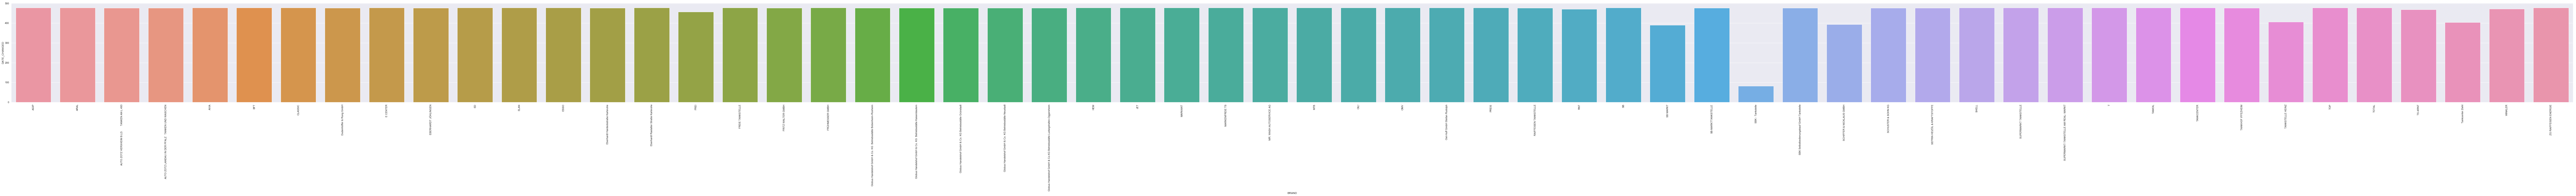

In [55]:
sns.set(rc={'figure.figsize':(201,8)})
q1=sns.barplot(x="BRAND",y="DATE_CHANGED",data=brand_start_date)
plt.xticks(rotation=90)

# There are in all 58 different Brands

In [56]:
gas_weakly= df[['BRAND', 'E5', 'E10', 'DIESEL','DATE_CHANGED']]

# 2. What is the min, mean, max price for each gasoline type weekly (time series graph)

In [57]:
dff=df

In [58]:
dff.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
6,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
8,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847


In [59]:
d1=dff

In [60]:
# function to remove the outliers
def drop_outliers(y):
    data_mean, data_std= d1[y].mean(),d1[y].std()
    cut_off=data_std*3
    lower,upper= data_mean- cut_off, data_mean+cut_off
    d1[y]=np.where(np.logical_or(d1[y]<lower,d1[y]>upper),d1[y].median(),d1[y])

In [61]:
drop_outliers('E5')
drop_outliers('E10')
drop_outliers('DIESEL')

# Time Series graph showing min, mean and max prices weakly for E5

Text(0, 0.5, 'Price in Euros')

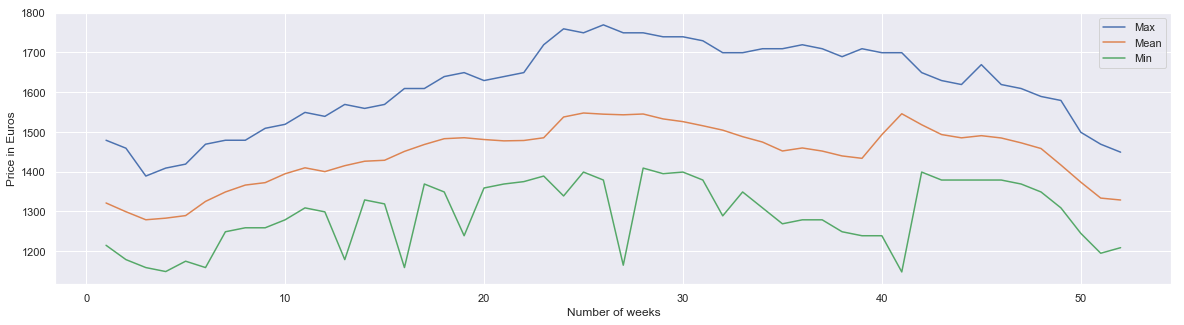

In [62]:
plt.figure(figsize=(20,5))
max_plot_e5 = d1.groupby(d1.DATE_CHANGED.dt.week).E5.max().plot(label='Max')
mean_plot_e5 = d1.groupby(d1.DATE_CHANGED.dt.week).E5.mean().plot(label='Mean')
min_plot_e5 = d1.groupby(d1.DATE_CHANGED.dt.week).E5.min().plot(label='Min')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros')

# Time Series graph showing min, mean and max prices weakly for E10

Text(0, 0.5, 'Price in Euros')

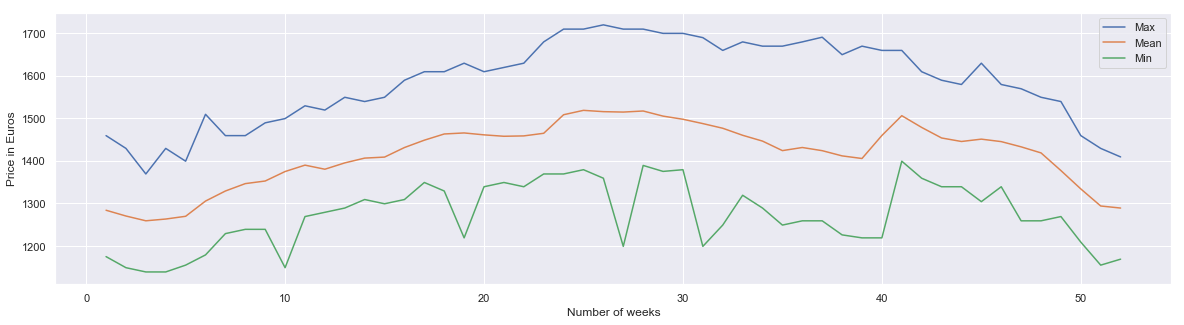

In [63]:
plt.figure(figsize=(20,5))
max_plot_e10 = d1.groupby(d1.DATE_CHANGED.dt.week).E10.max().plot(label='Max')
mean_plot_e10 = d1.groupby(d1.DATE_CHANGED.dt.week).E10.mean().plot(label='Mean')
min_plot_e10 = d1.groupby(d1.DATE_CHANGED.dt.week).E10.min().plot(label='Min')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros')

# Time Series graph showing min, mean and max prices weakly for DIESEL

Text(0, 0.5, 'Price in Euros')

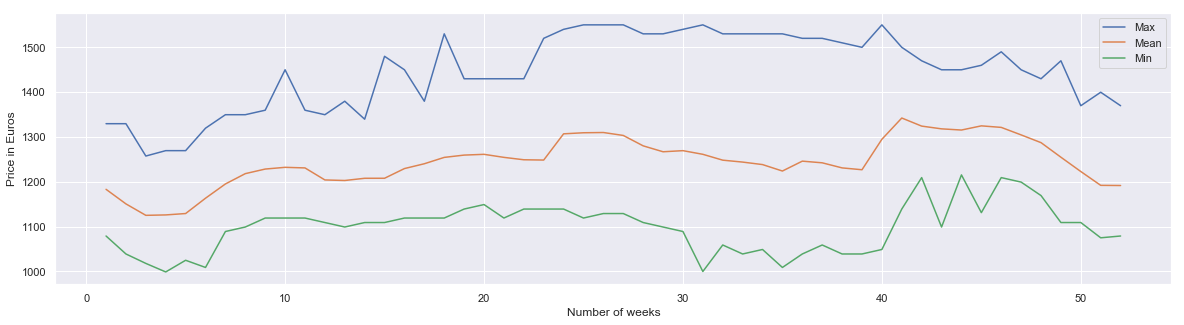

In [64]:
plt.figure(figsize=(20,5))
max_plot_D = d1.groupby(d1.DATE_CHANGED.dt.week).DIESEL.max().plot(label='Max')
mean_plot_D = d1.groupby(d1.DATE_CHANGED.dt.week).DIESEL.mean().plot(label='Mean')
min_plot_D = d1.groupby(d1.DATE_CHANGED.dt.week).DIESEL.min().plot(label='Min')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros')

# 3. What is cheapest station (in average), why is it the cheapest

# Cheapest station in average is "Ludwigshafen Industriestr. 51" of Brand "HEM"

In [65]:
# Sorting the stations as per the cheapest value of E5, E10 and Diesel
cheap_stn_E5=d1.groupby('STID')['E5'].min().sort_values().reset_index()
cheap_stn_E10=d1.groupby('STID')['E10'].min().sort_values().reset_index()
cheap_stn_D=d1.groupby('STID')['DIESEL'].min().sort_values().reset_index()

In [66]:
cheap_stn_E5.head()

,STID,E5
0,8884eb23-71e2-477f-b07a-1085619e7063,1148.0
1,e1a15081-25b6-9107-e040-0b0a3dfe563c,1149.0
2,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1159.0
3,a3c6ca46-73ea-4adf-a36b-0334c0ff6472,1159.0
4,2d74b7b9-b9fe-483a-84fd-a1aabd59079b,1159.0


In [67]:
d1.loc[dff['STID']=='8884eb23-71e2-477f-b07a-1085619e7063']

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
941582,8884eb23-71e2-477f-b07a-1085619e7063,1399.0,1359.0,1249.0,2014-12-15 06:46:01,21,19,2015-08-27 20:00:04.000000,Tankhof Wiebelskircher,FREIE TANKSTELLE,Hauptstr.,101,67133,Maxdorf,\N,49.48181,8.28411
941584,8884eb23-71e2-477f-b07a-1085619e7063,1369.0,1329.0,1219.0,2014-12-16 05:54:01,21,19,2015-08-27 20:00:04.000000,Tankhof Wiebelskircher,FREIE TANKSTELLE,Hauptstr.,101,67133,Maxdorf,\N,49.48181,8.28411
941586,8884eb23-71e2-477f-b07a-1085619e7063,1349.0,1309.0,1209.0,2014-12-16 08:42:01,21,19,2015-08-27 20:00:04.000000,Tankhof Wiebelskircher,FREIE TANKSTELLE,Hauptstr.,101,67133,Maxdorf,\N,49.48181,8.28411
941588,8884eb23-71e2-477f-b07a-1085619e7063,1379.0,1339.0,1199.0,2014-12-17 06:22:01,20,19,2015-08-27 20:00:04.000000,Tankhof Wiebelskircher,FREIE TANKSTELLE,Hauptstr.,101,67133,Maxdorf,\N,49.48181,8.28411
941590,8884eb23-71e2-477f-b07a-1085619e7063,1369.0,1329.0,1189.0,2014-12-17 07:38:01,21,19,2015-08-27 20:00:04.000000,Tankhof Wiebelskircher,FREIE TANKSTELLE,Hauptstr.,101,67133,Maxdorf,\N,49.48181,8.28411
941592,8884eb23-71e2-477f-b07a-1085619e7063,1509.0,1469.0,1329.0,2014-11-06 21:53:00,21,19,2015-08-27 20:00:04.000000,Tankhof Wiebelskircher,FREIE TANKSTELLE,Hauptstr.,101,67133,Maxdorf,\N,49.48181,8.28411
941594,8884eb23-71e2-477f-b07a-1085619e7063,1529.0,1489.0,1369.0,2014-11-07 21:49:00,21,19,2015-08-27 20:00:04.000000,Tankhof Wiebelskircher,FREIE TANKSTELLE,Hauptstr.,101,67133,Maxdorf,\N,49.48181,8.28411
941596,8884eb23-71e2-477f-b07a-1085619e7063,1499.0,1459.0,1339.0,2014-11-09 08:05:00,21,19,2015-08-27 20:00:04.000000,Tankhof Wiebelskircher,FREIE TANKSTELLE,Hauptstr.,101,67133,Maxdorf,\N,49.48181,8.28411
941598,8884eb23-71e2-477f-b07a-1085619e7063,1469.0,1429.0,1289.0,2014-11-11 15:25:00,21,19,2015-08-27 20:00:04.000000,Tankhof Wiebelskircher,FREIE TANKSTELLE,Hauptstr.,101,67133,Maxdorf,\N,49.48181,8.28411
941600,8884eb23-71e2-477f-b07a-1085619e7063,1439.0,1399.0,1259.0,2014-11-12 18:25:00,21,19,2015-08-27 20:00:04.000000,Tankhof Wiebelskircher,FREIE TANKSTELLE,Hauptstr.,101,67133,Maxdorf,\N,49.48181,8.28411


Cheapest Station for E5 is "Tankhof Wiebelskircher" of Brand "FREIE TANKSTELLE"

In [68]:
cheap_stn_E10.head()

,STID,E10
0,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1139.0
1,51d4b69f-a095-1aa0-e100-80009459e03a,1139.0
2,e1a15081-25b6-9107-e040-0b0a3dfe563c,1139.0
3,51d4b4e4-a095-1aa0-e100-80009459e03a,1149.0
4,f35ba2a2-964a-43ce-af2b-d22a6b0d53c9,1149.0


In [69]:
d1.loc[dff['STID']=='400ce1d0-e095-47dd-a0fc-6073edd7c8d2']

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
791568,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1339.0,1299.0,1199.0,2014-12-15 07:58:01,21,1,2013-07-31 16:46:14.000000,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Oderstraße,6,67061,Ludwigshafen-Oggersheim,\N,49.48664,8.3493
791570,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1319.0,1279.0,1189.0,2014-12-15 08:58:01,21,1,2013-07-31 16:46:14.000000,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Oderstraße,6,67061,Ludwigshafen-Oggersheim,\N,49.48664,8.3493
791572,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1309.0,1269.0,1179.0,2014-12-15 10:14:01,21,1,2013-07-31 16:46:14.000000,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Oderstraße,6,67061,Ludwigshafen-Oggersheim,\N,49.48664,8.3493
791574,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1299.0,1259.0,1169.0,2014-12-15 11:50:01,21,1,2013-07-31 16:46:14.000000,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Oderstraße,6,67061,Ludwigshafen-Oggersheim,\N,49.48664,8.3493
791576,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1319.0,1279.0,1179.0,2014-12-16 09:22:01,21,1,2013-07-31 16:46:14.000000,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Oderstraße,6,67061,Ludwigshafen-Oggersheim,\N,49.48664,8.3493
791578,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1299.0,1259.0,1159.0,2014-12-16 11:30:01,21,1,2013-07-31 16:46:14.000000,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Oderstraße,6,67061,Ludwigshafen-Oggersheim,\N,49.48664,8.3493
791580,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1289.0,1249.0,1149.0,2014-12-16 12:14:01,21,1,2013-07-31 16:46:14.000000,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Oderstraße,6,67061,Ludwigshafen-Oggersheim,\N,49.48664,8.3493
791582,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1269.0,1229.0,1119.0,2014-12-17 10:42:01,21,1,2013-07-31 16:46:14.000000,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Oderstraße,6,67061,Ludwigshafen-Oggersheim,\N,49.48664,8.3493
791584,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1259.0,1219.0,1109.0,2014-12-17 13:26:01,21,1,2013-07-31 16:46:14.000000,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Oderstraße,6,67061,Ludwigshafen-Oggersheim,\N,49.48664,8.3493
791586,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1259.0,1219.0,1119.0,2014-12-18 13:06:01,21,1,2013-07-31 16:46:14.000000,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Oderstraße,6,67061,Ludwigshafen-Oggersheim,\N,49.48664,8.3493


Cheapest station for E10 is "Globus Handelshof GmbH & Co.KG Betriebsstätte ..."

In [70]:
cheap_stn_D.head()

,STID,DIESEL
0,e1a15081-25b6-9107-e040-0b0a3dfe563c,999.0
1,51d4b4e4-a095-1aa0-e100-80009459e03a,999.0
2,51d4b69f-a095-1aa0-e100-80009459e03a,999.0
3,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,999.0
4,f0a63434-d85b-4a06-a583-11724f884450,1000.0


In [71]:
d1.loc[dff['STID']=='e1a15081-25b6-9107-e040-0b0a3dfe563c']

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
819832,e1a15081-25b6-9107-e040-0b0a3dfe563c,1449.0,1429.0,1189.0,2015-06-14 21:26:01,20,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819834,e1a15081-25b6-9107-e040-0b0a3dfe563c,1539.0,1519.0,1279.0,2015-06-14 23:10:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819836,e1a15081-25b6-9107-e040-0b0a3dfe563c,1529.0,1509.0,1259.0,2015-06-15 03:42:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819838,e1a15081-25b6-9107-e040-0b0a3dfe563c,1509.0,1489.0,1239.0,2015-06-15 06:46:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819840,e1a15081-25b6-9107-e040-0b0a3dfe563c,1529.0,1509.0,1259.0,2015-06-16 03:46:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819842,e1a15081-25b6-9107-e040-0b0a3dfe563c,1509.0,1489.0,1259.0,2015-06-16 06:46:01,20,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819844,e1a15081-25b6-9107-e040-0b0a3dfe563c,1509.0,1489.0,1229.0,2015-06-16 06:50:01,1,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819846,e1a15081-25b6-9107-e040-0b0a3dfe563c,1499.0,1479.0,1219.0,2015-06-16 08:46:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819848,e1a15081-25b6-9107-e040-0b0a3dfe563c,1489.0,1469.0,1209.0,2015-06-17 09:14:01,1,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819850,e1a15081-25b6-9107-e040-0b0a3dfe563c,1499.0,1479.0,1219.0,2015-06-18 09:14:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048


Cheapest station for Diesel is "Ludwigshafen Industriestr. 51" of Brand "HEM"

In [72]:
# Merging the station Data for cheap price
x=pd.merge(cheap_stn_E5,cheap_stn_E10)

In [73]:
cheap_stn=pd.merge(x,cheap_stn_D)

In [74]:
cheap_stn['mean']=cheap_stn.mean(axis=1)

In [75]:
cheap_stn.sort_values(by='mean').head()

,STID,E5,E10,DIESEL,mean
1,e1a15081-25b6-9107-e040-0b0a3dfe563c,1149.0,1139.0,999.0,1095.666667
2,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1159.0,1139.0,999.0,1099.000000
6,51d4b69f-a095-1aa0-e100-80009459e03a,1159.0,1139.0,999.0,1099.000000
8,51d4b4e4-a095-1aa0-e100-80009459e03a,1169.0,1149.0,999.0,1105.666667
7,e69a923a-ba11-409b-2720-2b908ed66498,1165.0,1155.0,1025.0,1115.000000


In [76]:
d1.loc[dff['STID']=='e1a15081-25b6-9107-e040-0b0a3dfe563c'].head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
819832,e1a15081-25b6-9107-e040-0b0a3dfe563c,1449.0,1429.0,1189.0,2015-06-14 21:26:01,20,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819834,e1a15081-25b6-9107-e040-0b0a3dfe563c,1539.0,1519.0,1279.0,2015-06-14 23:10:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819836,e1a15081-25b6-9107-e040-0b0a3dfe563c,1529.0,1509.0,1259.0,2015-06-15 03:42:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819838,e1a15081-25b6-9107-e040-0b0a3dfe563c,1509.0,1489.0,1239.0,2015-06-15 06:46:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048
819840,e1a15081-25b6-9107-e040-0b0a3dfe563c,1529.0,1509.0,1259.0,2015-06-16 03:46:01,21,10,2015-04-12 21:40:08.000000,Ludwigshafen Industriestr. 51,HEM,Industriestr.,51,67063,Ludwigshafen,deRP,49.4884,8.4048


# 4. At which day of a weak is the price most likely the cheapest (week profile)

# Fuel prices are cheaper on "Saturday"

In [77]:
da=d1

In [78]:
da.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589.0,1549.0,1389.0,2014-10-02 05:22:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1369.0,2014-10-02 05:26:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1359.0,2014-10-02 09:06:01,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
6,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539.0,1499.0,1339.0,2014-10-03 12:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
8,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529.0,1489.0,1329.0,2014-10-03 14:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847


In [79]:
day_wavg=da.groupby(da.DATE_CHANGED.dt.weekday_name)[['E5','E10','DIESEL']].mean().reset_index()

In [80]:
day_wavg['Mean_Price']=day_wavg.mean(axis=1)

In [81]:
day_wavg

,DATE_CHANGED,E5,E10,DIESEL,Mean_Price
0,Friday,1455.637634,1427.668009,1246.440579,1376.582074
1,Monday,1458.793954,1430.495719,1249.915458,1379.735043
2,Saturday,1454.793504,1427.018182,1245.856266,1375.889317
3,Sunday,1461.109058,1433.627451,1250.780884,1381.839131
4,Thursday,1455.991333,1428.041031,1246.841517,1376.957960
5,Tuesday,1456.923483,1428.941860,1247.273223,1377.712855
6,Wednesday,1456.641937,1428.680306,1247.101392,1377.474545


In [82]:
day_wavg = day_wavg.groupby(['DATE_CHANGED']).sum().reindex(day_name[0:7]) 

In [83]:
day_wavg

,E5,E10,DIESEL,Mean_Price
DATE_CHANGED,,,,
Monday,1458.793954,1430.495719,1249.915458,1379.735043
Tuesday,1456.923483,1428.941860,1247.273223,1377.712855
Wednesday,1456.641937,1428.680306,1247.101392,1377.474545
Thursday,1455.991333,1428.041031,1246.841517,1376.957960
Friday,1455.637634,1427.668009,1246.440579,1376.582074
Saturday,1454.793504,1427.018182,1245.856266,1375.889317
Sunday,1461.109058,1433.627451,1250.780884,1381.839131


In [84]:
cheapestPrice_day = day_wavg['Mean_Price'].idxmin()

In [85]:
cheapestPrice_day

'Saturday'

# 5. At which hour during a day is the price the cheapest (hour profile)

In [86]:
h_avg=df.groupby(d1.DATE_CHANGED.dt.hour)[['DIESEL','E5','E10']].min()

In [87]:
h_avg.sort_values(by="E5")

,DIESEL,E5,E10
DATE_CHANGED,,,
9,1025.0,1148.0,1159.0
18,999.0,1149.0,1139.0
13,1000.0,1159.0,1139.0
12,1019.0,1159.0,1139.0
19,999.0,1159.0,1149.0
17,999.0,1159.0,1139.0
10,1009.0,1159.0,1159.0
15,999.0,1159.0,1159.0
11,1029.0,1169.0,1149.0


In [88]:
cheapest_hour_E5 = h_avg['E5'].idxmin()
cheapest_hour_E5

9

E5 is chesapest at 9 hr of day.

In [89]:
h_avg.sort_values(by="E10")

,DIESEL,E5,E10
DATE_CHANGED,,,
13,1000.0,1159.0,1139.0
12,1019.0,1159.0,1139.0
18,999.0,1149.0,1139.0
17,999.0,1159.0,1139.0
11,1029.0,1169.0,1149.0
6,1049.0,1209.0,1149.0
16,999.0,1169.0,1149.0
19,999.0,1159.0,1149.0
7,1049.0,1195.0,1155.0


In [90]:
cheapest_hour_E10 = h_avg['E10'].idxmin()
cheapest_hour_E10

12

E10 is cheapest at 12 hr of day

In [91]:
h_avg.sort_values(by="DIESEL")

,DIESEL,E5,E10
DATE_CHANGED,,,
19,999.0,1159.0,1149.0
18,999.0,1149.0,1139.0
17,999.0,1159.0,1139.0
16,999.0,1169.0,1149.0
15,999.0,1159.0,1159.0
14,999.0,1189.0,1169.0
13,1000.0,1159.0,1139.0
20,1009.0,1195.0,1175.0
10,1009.0,1159.0,1159.0


In [92]:
cheapest_hour_Diesel = h_avg['DIESEL'].idxmin()
cheapest_hour_Diesel

14

Diesel is cheapest at 14 hr of day

Text(0, 0.5, 'Price')

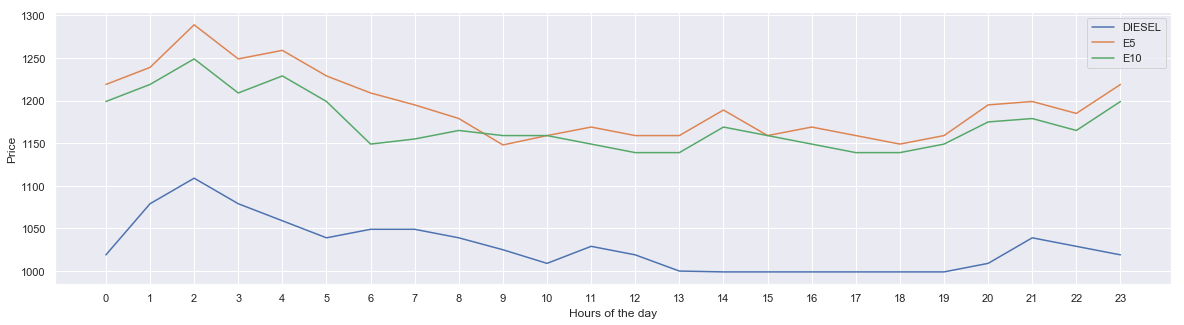

In [93]:
h_avg.plot.line(figsize=(20,5),xticks=range(0,24,1))
plt.legend(loc='upper right')
plt.xlabel('Hours of the day')
plt.ylabel('Price')

# 6. How many different locations are present in the data (visualize via a map)

In [123]:
!pip install folium

In [124]:
locations = d1[['LAT','LNG']]
locations.drop_duplicates(inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [125]:
import folium
map = folium.Map(location=[49.633409, 8.273847], zoom_start=7)
for point in range(0, len(locations)):
    folium.Marker([locations.iloc[point,0],locations.iloc[point,1]], popup="test").add_to(map)
map

# 7. What is the gas station which has most price data points, choose one and draw the time series for all 3 gas types

In [97]:
z=d1.BRAND.value_counts()

In [98]:
z.head()

SHELL    190298
ARAL     181216
ESSO     119358
AVIA     114336
TOTAL     79207
Name: BRAND, dtype: int64

In [99]:
shell=dff[dff['BRAND']=='SHELL']

In [100]:
shell.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
22424,eb39e146-8263-4093-835d-30c8073e2eb2,1399.0,1379.0,1139.0,2015-08-13 14:50:01,21,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,SHELL,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197
22426,eb39e146-8263-4093-835d-30c8073e2eb2,1379.0,1359.0,1139.0,2015-08-13 15:18:01,20,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,SHELL,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197
22428,eb39e146-8263-4093-835d-30c8073e2eb2,1409.0,1389.0,1139.0,2015-08-14 13:14:01,20,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,SHELL,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197
22430,eb39e146-8263-4093-835d-30c8073e2eb2,1399.0,1379.0,1139.0,2015-08-14 13:30:01,20,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,SHELL,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197
22432,eb39e146-8263-4093-835d-30c8073e2eb2,1419.0,1399.0,1169.0,2015-08-15 12:02:01,21,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,SHELL,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197


Text(0, 0.5, 'Price in Euros')

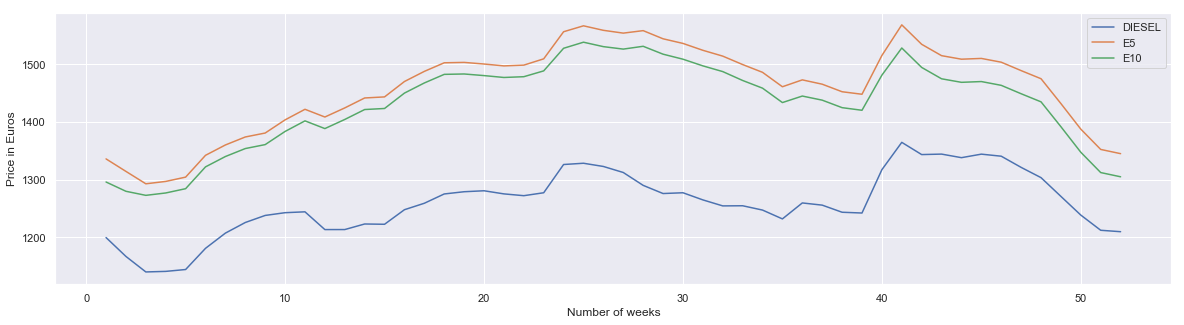

In [101]:
plt.figure(figsize=(20,5))
max_plot_e5 = shell.groupby(shell.DATE_CHANGED.dt.week).DIESEL.mean().plot(label='DIESEL')
mean_plot_e5 = shell.groupby(shell.DATE_CHANGED.dt.week).E5.mean().plot(label='E5')
min_plot_e5 = shell.groupby(shell.DATE_CHANGED.dt.week).E10.mean().plot(label='E10')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros')

"SHELL" has highest data points.

# 8. At which hour during a day do we have the most price changes

In [102]:
price_brand=d1[['BRAND','E5','E10','DIESEL','DATE_CHANGED']]

Text(0, 0.5, 'Price chab=nge count')

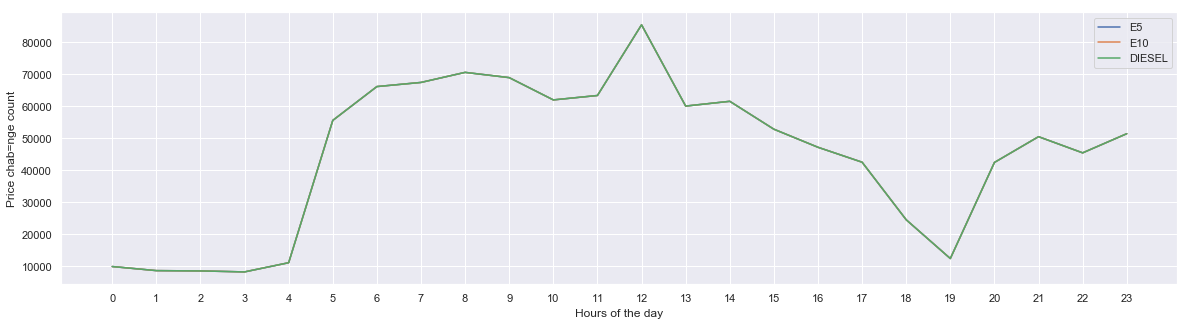

In [103]:
price_change=price_brand.groupby(price_brand.DATE_CHANGED.dt.hour)['E5','E10','DIESEL'].count().plot(figsize=(20,5),xticks=range(0,24))
plt.xlabel('Hours of the day')
plt.ylabel('Price chab=nge count')

We have most price changes at 12 hr of day.

# 9. Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of e10 and diesel.

In [104]:
df_brands1 = df_brands1[['STID','E5','E10','DIESEL','DATE_CHANGED_x','BRAND','DATE_CHANGED_y']]

In [105]:
df_brands1.head()

,STID,E5,E10,DIESEL,DATE_CHANGED_x,BRAND,DATE_CHANGED_y
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,ESSO,478
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,ESSO,478
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,ESSO,478
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,ESSO,478
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,ESSO,478


In [106]:
#setting index to datetime
df_brands1['Datetime'] = pd.to_datetime(df_brands1['DATE_CHANGED_x'])
df_brands1 = df_brands1.set_index('Datetime')

In [107]:
df_brands1.head()

,STID,E5,E10,DIESEL,DATE_CHANGED_x,BRAND,DATE_CHANGED_y
Datetime,,,,,,,
2014-10-02 05:22:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,ESSO,478
2014-10-02 05:26:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,ESSO,478
2014-10-02 09:06:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,ESSO,478
2014-10-03 12:14:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,ESSO,478
2014-10-03 14:14:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,ESSO,478


In [108]:
df_brand1_group= df_brands1.groupby('BRAND')['STID','DATE_CHANGED_x','DATE_CHANGED_y','E5','E10','DIESEL'].max().reset_index()

In [109]:
df_brand1_group.head()

,BRAND,STID,DATE_CHANGED_x,DATE_CHANGED_y,E5,E10,DIESEL
0,AGIP,fb706efa-ebbc-406e-bef7-6c0c9ab205bd,2015-09-29 23:06:01,478,1699,1879,1479
1,ARAL,fe9954a8-3042-46ef-bed8-63d753aeb9e8,2015-09-29 23:02:01,478,1829,1809,1589
2,AUTO ZOTZ HERXHEIM B.LD. TANKEN AN L.493,e69a923a-ba11-409b-2720-2b908ed66498,2015-09-29 17:42:01,477,1649,1609,1409
3,AUTO ZOTZ LANDAU IN DER PFALZ TANKEN UND WAS...,a21e3ed2-6d03-478f-32a3-9f33202182bc,2015-09-29 15:22:01,477,1615,1575,1395
4,AVIA,fd0297ad-c29d-48ac-a33f-47f155103ae5,2015-09-29 23:34:01,478,1709,1669,1509


In [110]:
df_brand1_days= df_brand1_group.groupby('DATE_CHANGED_y')

In [111]:
max_idx = df_brand1_days['BRAND'].count().idxmax()
max_idx

478

In [112]:
top_brands_20= (df_brand1_days.get_group(max_idx)['BRAND'][:20]).reset_index()

In [113]:
top_brands_20.drop('index',axis=1,inplace=True)

In [114]:
top_brands_20

,BRAND
0,AGIP
1,ARAL
2,AVIA
3,BFT
4,CLASSIC
5,E CENTER
6,ED
7,ELAN
8,ESSO
9,Eberhardt Rastatter Straße Karlsruhe


In [115]:
brands_list=np.ravel(top_brands_20.values)

In [116]:
df_brands_top20 = df_brands1[df_brands1.BRAND.isin(brands_list)]

In [117]:
df_brands_top20.head()

,STID,E5,E10,DIESEL,DATE_CHANGED_x,BRAND,DATE_CHANGED_y
Datetime,,,,,,,
2014-10-02 05:22:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,ESSO,478
2014-10-02 05:26:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,ESSO,478
2014-10-02 09:06:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,ESSO,478
2014-10-03 12:14:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,ESSO,478
2014-10-03 14:14:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,ESSO,478


In [118]:
brands_12_13=df_brands_top20.between_time('12:00','13:00')

In [119]:
brands_12_13.head()

,STID,E5,E10,DIESEL,DATE_CHANGED_x,BRAND,DATE_CHANGED_y
Datetime,,,,,,,
2014-10-03 12:14:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,ESSO,478
2014-10-14 12:14:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1519,1479,1309,2014-10-14 12:14:01,ESSO,478
2014-10-14 12:18:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1509,1469,1309,2014-10-14 12:18:01,ESSO,478
2014-10-20 12:18:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1469,1429,1289,2014-10-20 12:18:01,ESSO,478
2015-02-22 12:42:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,1339,1319,1169,2015-02-22 12:42:01,ESSO,478


In [120]:
top_brands_12_13=brands_12_13.groupby(brands_12_13.index.month)['E10','DIESEL'].mean()

In [121]:
top_brands_12_13

,E10,DIESEL
Datetime,,
1,1243.530403,1112.538095
2,1301.569245,1166.697392
3,1358.382151,1189.075188
4,1401.228774,1199.333558
5,1431.483411,1225.119515
6,1465.408617,1245.339489
7,1482.051074,1223.147494
8,1425.433439,1189.321205
9,1384.303791,1195.498691


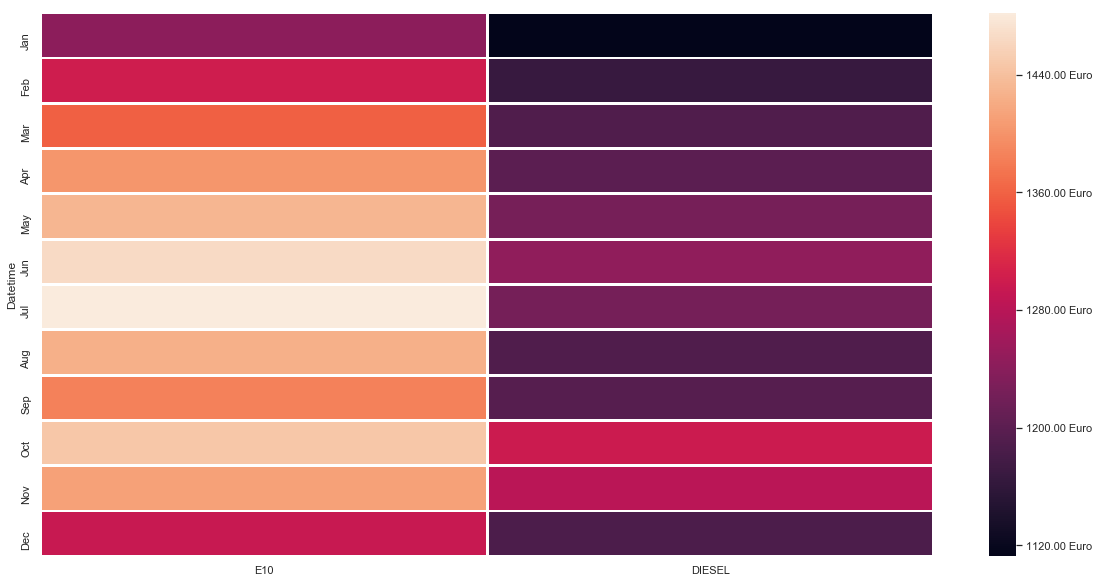

In [122]:
plt.figure(figsize=(20,10))
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.heatmap(top_brands_12_13, cbar_kws={'format': '%1.2f Euro'}, yticklabels=months,linewidths=2, square=False);

# 10. Describe a possible business potential in € for the customer (textual description in the ipyhton file)

Business Description : 
    The fuel prices are quite fluctuating hence it is necessary to consider different parameters before filling the fuel as it would prove economical.
    
    Different parameters like location, brand, day of the week and time of the day should be taken into consideration as these are the effecting parameters.
    
    The cheapest station in average is "Ludwigshafen Industriestr. 51", so it will be economical to fill fuel at this station.
    
    Try filling fuel on Saturdays as it is cheapest.
    
    E5 is cheapest at 9 hr of day, E10 cheaper at 12 hr of day and diesel is cheaper at 14 hr of day, so it would be preferable to fill fuel at these hrs of day.
    
    Maximum price changes are at 12 hr of day so it is not recommended to fill fuel at this time.